In [339]:
import matplotlib.pyplot as plt
import numpy as np

Nbits = 12
f = 6
np.random.seed(Nbits)
a = np.random.randint(0, 2, Nbits)
print(a)

[1 1 0 1 1 0 1 1 0 0 0 1]


In [340]:
def autoplot(_plotx, _ploty, _title, _xlabel, _ylabel) -> None:
  plt.title(_title)
  plt.xlabel(_xlabel)
  plt.ylabel(_ylabel)
  if _plotx is None:
    plt.plot(_ploty)
  else:
    plt.plot(_plotx, _ploty)
  plt.show();

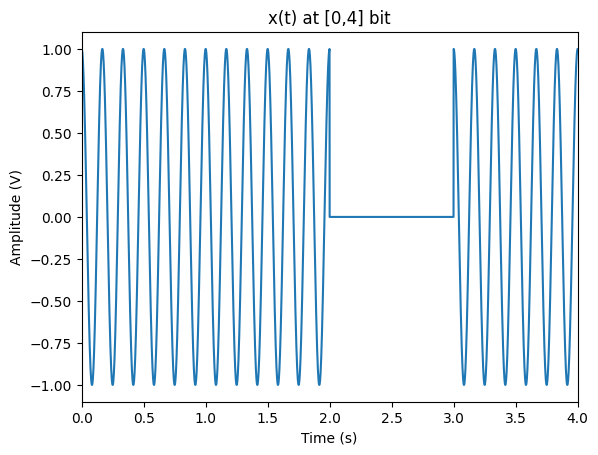

In [341]:
t1 = np.arange(0, 1, 0.001)
ht = np.cos(2 * np.pi * f * t1)
h0 = np.zeros(1000)
ask = []
for i in range(0, a.size):
  if a[i] > 0:
    ask.extend(ht)
  else:
    ask.extend(h0)

t = np.arange(0, Nbits, 0.001)
ask = np.array(ask)
plt.xlim(0, 4)
autoplot(t, ask, "x(t) at [0,4] bit", "Time (s)", "Amplitude (V)")

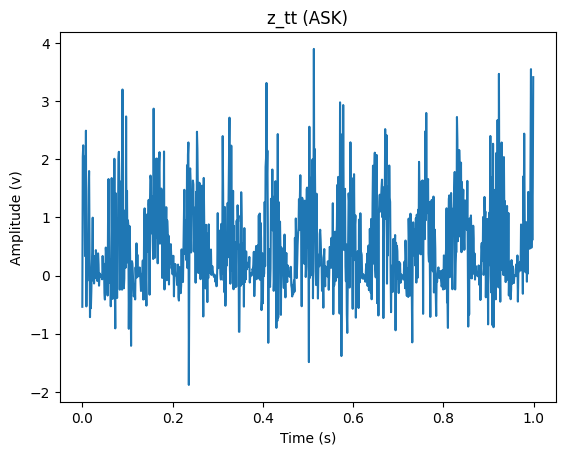

In [342]:
nt = np.random.normal(0, 1, t.size)
rt = np.add(ask, nt)

cor = np.cos(2 * np.pi * f * t1)
z_t = []
for j in range(0, Nbits):
  j1 = j * t1.size
  j2 = (j+1) * t1.size
  z_tt = np.multiply(rt[j1:j2], cor)
  z_t.append(z_tt.sum())

t = np.arange(0, 1, 0.001)
autoplot(t, z_tt, "z_tt (ASK)", "Time (s)", "Amplitude (v)")

[1 1 0 1 1 0 1 1 0 0 0 1]
err_num =  0


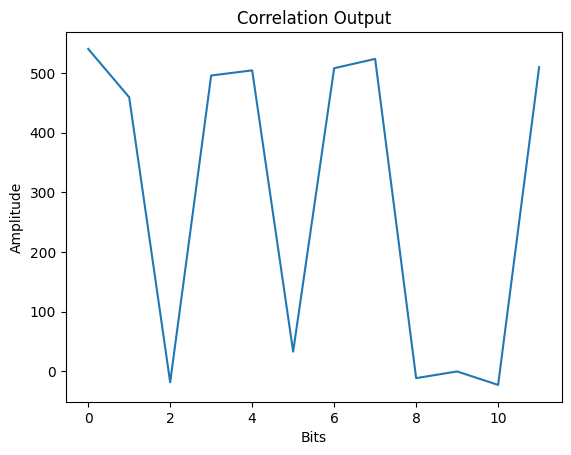

In [343]:
med = (max(z_t) + min(z_t)) / 2
a_hat = np.where(z_t > med, 1, 0)
err_num = sum(a_hat != a)
print(a_hat)
print("err_num = ", err_num)

autoplot(None, z_t, "Correlation Output", "Bits", "Amplitude")

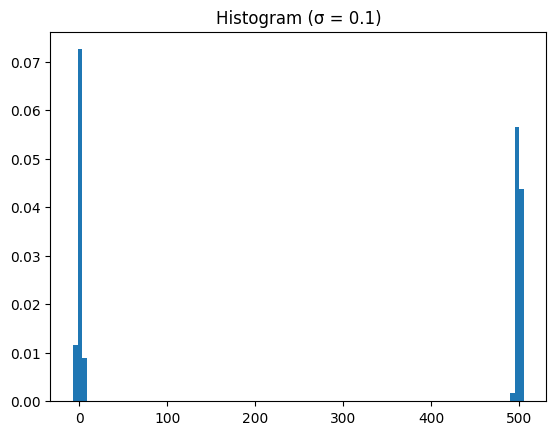

In [344]:
# 4.a (σ = 0.1)
Nbits = 1000
a = np.random.randint(0, 2, Nbits)
t1 = np.arange(0, 1, 0.001)
ht = np.cos(2 * np.pi * f * t1)
h0 = np.zeros(1000)
ask = []
for i in range(0, a.size):
  if a[i] > 0:
    ask.extend(ht)
  else:
    ask.extend(h0)

sigma = 0.1
t = np.arange(0, Nbits, 0.001)
nt = np.random.normal(0, sigma, t.size)
rt = np.add(ask, nt)

cor = np.cos(2 * np.pi * f * t1)
z_t = []
for j in range(0, Nbits):
  j1 = j * t1.size
  j2 = (j+1) * t1.size
  z_tt = np.multiply(rt[j1:j2], cor)
  z_t.append(z_tt.sum())

plt.title("Histogram (σ = 0.1)")
plt.hist(z_t, density=True, bins=100)
plt.show();

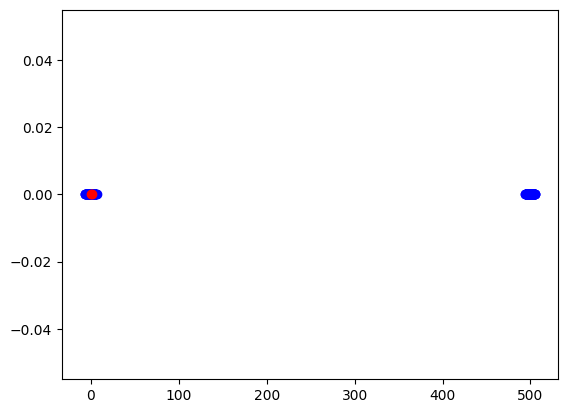

In [345]:
# 4.a plot signal vector
plt.scatter(z_t, np.zeros(Nbits), color='b')
plt.scatter([1, 0], [0, 0], color='r')
plt.show();

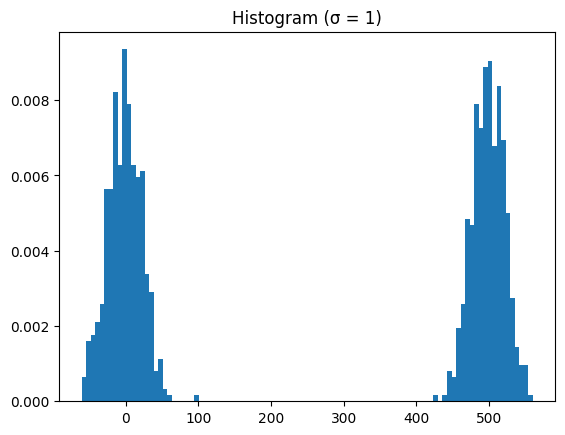

In [346]:
# 4.b (σ = 1)
Nbits = 1000
a = np.random.randint(0, 2, Nbits)
t1 = np.arange(0, 1, 0.001)
ht = np.cos(2 * np.pi * f * t1)
h0 = np.zeros(1000)
ask = []
for i in range(0, a.size):
  if a[i] > 0:
    ask.extend(ht)
  else:
    ask.extend(h0)

sigma = 1
t = np.arange(0, Nbits, 0.001)
nt = np.random.normal(0, sigma, t.size)
rt = np.add(ask, nt)

cor = np.cos(2 * np.pi * f * t1)
z_t = []
for j in range(0, Nbits):
  j1 = j * t1.size
  j2 = (j+1) * t1.size
  z_tt = np.multiply(rt[j1:j2], cor)
  z_t.append(z_tt.sum())

plt.title("Histogram (σ = 1)")
plt.hist(z_t, density=True, bins=100)
plt.show();

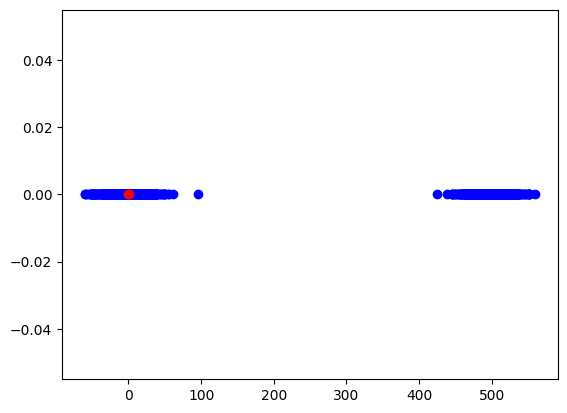

In [347]:
# 4.b plot signal vector
plt.scatter(z_t, np.zeros(Nbits), color='b')
plt.scatter([1, 0], [0, 0], color='r')
plt.show();

In [348]:
# BFSK Part
Nbits = 12
f1 = 4
f2 = 8
np.random.seed(Nbits)
a = np.random.randint(0, 2, Nbits)
print(a)

[1 1 0 1 1 0 1 1 0 0 0 1]


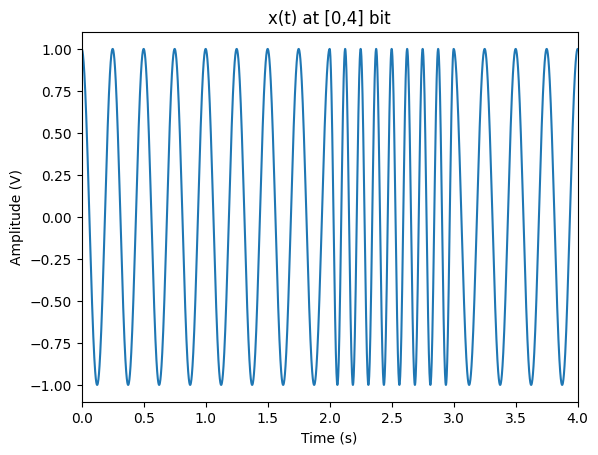

In [349]:
# BFSK part.b
t1 = np.arange(0, 1, 0.001)
h1 = np.cos(2 * np.pi * f1 * t1) # h1 = bit 0
h2 = np.cos(2 * np.pi * f2 * t1) # h2 = bit 1
bfsk = []
for i in range(0, a.size):
  if a[i] > 0:
    bfsk.extend(h1)
  else:
    bfsk.extend(h2)

t = np.arange(0, Nbits, 0.001)
bfsk = np.array(bfsk)
plt.xlim(0, 4)
autoplot(t, bfsk, "x(t) at [0,4] bit", "Time (s)", "Amplitude (V)")

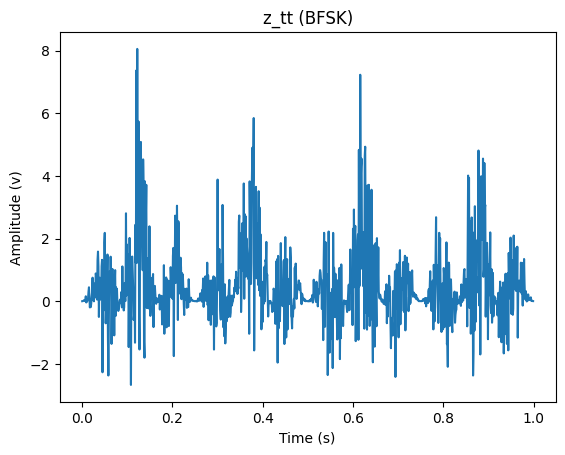

In [350]:
# BFSK part.c
nt = np.random.normal(0, 1, t.size)
rt = np.add(bfsk, nt)

cor = np.cos(2 * np.pi * f1 * t1) - np.cos(2 * np.pi * f2 * t1)
z_t = []
for j in range(0, Nbits):
  j1 = j * t1.size
  j2 = (j+1) * t1.size
  z_tt = np.multiply(rt[j1:j2], cor)
  z_t.append(z_tt.sum())

t = np.arange(0, 1, 0.001)
autoplot(t, z_tt, "z_tt (BFSK)", "Time (s)", "Amplitude (v)")

[1 1 0 1 1 0 1 1 0 0 0 1]
err_num =  0


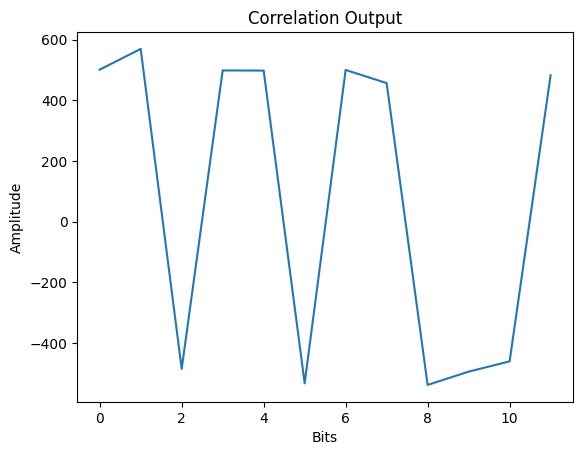

In [351]:
med = (max(z_t) + min(z_t)) / 2
a_hat = np.where(z_t > med, 1, 0)
err_num = sum(a_hat != a)
print(a_hat)
print("err_num = ", err_num)

autoplot(None, z_t, "Correlation Output", "Bits", "Amplitude")